Universidade Estadual de Campinas - UNICAMP

Faculdade de Engenharia Elétrica e de Computação - FEEC

### IA048 – Aprendizado de Máquina

Alunos:
* Taylon xxxxx (RA: 0000000)
* Tiago Corrêa de Araújo de Amorim (RA: 100.675)

# Lista 01

## Tarefa

Trabalhar com a base de dados U.S. Airline Traffic Data, a qual contém informações referentes ao tráfego aéreo mensal norte-americano no período de 2003 a 2023, disponibilizadas pelo U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics. Em particular, vamos explorar a série temporal do número total de vôos (domésticos e internacionais).

Explorar um modelo linear para a previsão considerando que o horizonte de predição é L = 1 (passos à frente da série temporal).

## Dataset

* [Lista01\air traffic.csv](https://www.kaggle.com/datasets/yyxian/u-s-airline-traffic-data/data)

* This dataset provides U.S. monthly airline traffic from 2003 to 2023, including number of passengers, number of flights, revenue passenger-miles (RPM), available seat-miles (ASM) and load factor.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [103]:
df_original = pd.read_csv("air traffic.csv")
df_original.describe()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
count,249.000000,249.000000,2.490000e+02,2.490000e+02,2.490000e+02,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,5.520971e+07,7.392209e+06,6.260192e+07,706750.710843,64736.172691,771486.883534,4.957803e+07,1.918103e+07,6.875906e+07,6.131822e+07,2.413903e+07,8.545724e+07,79.938394,77.304940,79.286305
std,6.002817,3.442803,1.044055e+07,2.020273e+06,1.229211e+07,107054.971522,12129.622461,115686.728629,1.035558e+07,5.711621e+06,1.548875e+07,8.996673e+06,5.650437e+06,1.382385e+07,8.860562,10.907145,8.895700
min,2003.000000,1.000000,2.877290e+06,1.366090e+05,3.013899e+06,217262.000000,4996.000000,222280.000000,2.551127e+06,3.567620e+05,2.907889e+06,1.948908e+07,1.541419e+06,2.103050e+07,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,5.098217e+07,6.395022e+06,5.766458e+07,662000.000000,61615.000000,727898.000000,4.458029e+07,1.660284e+07,6.182568e+07,5.655552e+07,2.173119e+07,7.919780e+07,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,5.620010e+07,7.419187e+06,6.389913e+07,709933.000000,66557.000000,779011.000000,4.985794e+07,1.968901e+07,6.900519e+07,6.088909e+07,2.464572e+07,8.505191e+07,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,6.089213e+07,8.567847e+06,6.944743e+07,781804.000000,71924.000000,848650.000000,5.568257e+07,2.266760e+07,7.803987e+07,6.626877e+07,2.770535e+07,9.255187e+07,85.240000,82.930000,84.070000
max,2023.000000,12.000000,7.537816e+07,1.243262e+07,8.781077e+07,890938.000000,82681.000000,964102.000000,7.226790e+07,3.137600e+07,1.036439e+08,8.199740e+07,3.532619e+07,1.173122e+08,89.960000,89.440000,89.140000


In [104]:
df_original['Date'] = pd.to_datetime(df_original[['Year', 'Month']].assign(day=1))
df_original.set_index('Date', inplace=True)
df_original = df_original[['Flt']]

## Item [a]
Exiba o gráfico da série temporal completa. Numa inspeção visual simples, é possível reconhecer ao menos três faixas distintas de comportamento aproximadamente “regular” na série: 
    
* (i) Jan/2003 a Ago/2008; 
* (ii) Set/2008 a Dez/2019; 
* (iii) Jan/2020 a Set/2023.

Discuta possíveis razões históricas/econômicas para as
transições de comportamento.

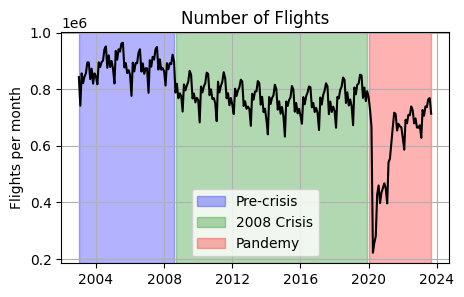

In [105]:
plt.figure(figsize=(5, 3))
plt.plot(df_original['Flt'], color='black', linestyle='-')

plt.axvspan(pd.to_datetime('2003-01-01'), pd.to_datetime('2008-08-01'),
            color='blue', alpha=0.3, label='Pre-crisis')
plt.axvspan(pd.to_datetime('2008-09-01'), pd.to_datetime('2019-12-01'),
            color='green', alpha=0.3, label='2008 Crisis')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2023-09-01'),
            color='red', alpha=0.3, label='Pandemy')

plt.ylabel('Flights per month')
plt.title('Number of Flights')
plt.grid(True)
plt.legend()
plt.savefig('report/png/A_MainSeries.png', bbox_inches='tight')
plt.show()

**Resposta**

O primeiro período (azul) é de certa normalidade na economia americana. O início do período em verde é marcado pela crise financeira do _subprime_ (estouro da bolha imobiliária nos EUA devido a empréstimos sem lastro e preços de imóveis inflacionados). O período em vermelho corresponde à crise sanitária causada pela pandemia de Covid-19. A queda mais significativa corresponde ao período de maior restrição de vôos imposta durante a crise sanitária.

**Série Temporal Alternativa**

A série original apresenta um caráter cíclico (com frequência anual) e _serrilhado_ (não-suave). Foram avaliadas duas alternativas para deixar a série temporal mais suave. Como os meses do ano não tem o mesmo número de dias, uma primeira tentativa foi de calcular o número médio de vôos por dia para cada mês da série. Uma segunda tentativa foi de calcular o número de vôos diários considerando apenas os dias úteis de cada mês.

Nota-se que a série temporal de média diária de vôos por mês se mostra mais suave que a série original. O efeito é mais pronunciado no mês de fevereiro. Já a série temporal de total mensal de vôos dividido pelo número de dias úteis não teve uma reposta adequada. 

Optou-se por utilizar a média mensal de vôos por dia nas análises posteriores. Todos os valores de RMSE e MAPE serão calculados em função desta nova série.

In [106]:
df_original['Days_in_month'] = df_original.index.days_in_month
df_original['Flt_per_day'] = df_original['Flt'] / df_original['Days_in_month']

def get_workdays(date):
    year = date.year
    month = date.month
    start_date = pd.Timestamp(year, month, 1)
    if month == 12:
        month = 0
        year = year+1
    end_date = pd.Timestamp(year, month+1, 1) - pd.Timedelta(1)
    return len(pd.bdate_range(start_date, end_date))

df_original['Workdays'] = [get_workdays(i) for i in df_original.index]
df_original['Flt_per_workday'] = df_original['Flt'] / df_original['Workdays']

In [107]:
def year_plot(years, column, title):
    date_format = DateFormatter("%b")
    plt.figure(figsize=(5, 3))
    for year in years:
        plt.plot(df_original.loc[f'{years[0]}-01-01':f'{years[0]+1}-01-01'].index,
                    df_original.loc[f'{year}-01-01':f'{year+1}-01-01'][column],
                    linestyle='-', label=year)
    plt.ylabel('Number of Flights')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.savefig(f'report/png/A_{title.replace(" ","_")}.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

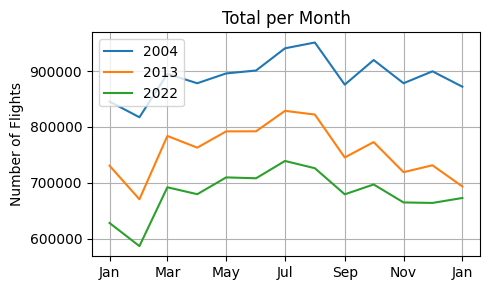

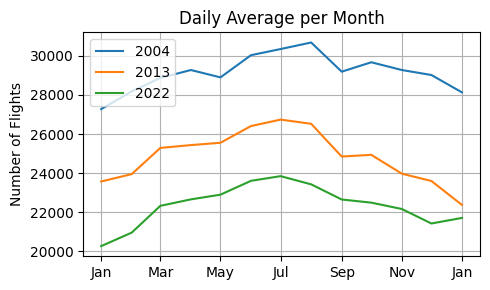

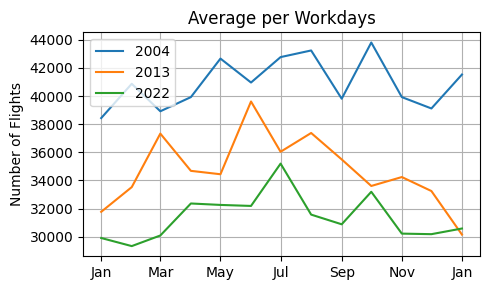

In [108]:
year_plot([2004, 2013, 2022],
          'Flt', 'Total per Month')
year_plot([2004, 2013, 2022],
          'Flt_per_day', 'Daily Average per Month')
year_plot([2004, 2013, 2022],
          'Flt_per_workday', 'Average per Workdays')

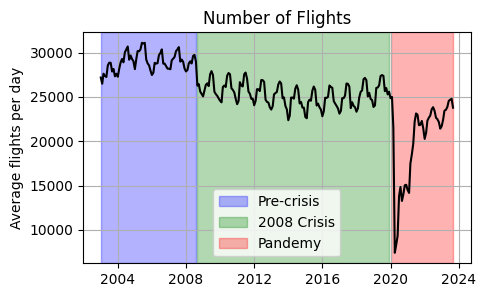

In [109]:
plt.figure(figsize=(5, 3))
plt.plot(df_original['Flt_per_day'],
         color='black', linestyle='-', marker='')

plt.axvspan(pd.to_datetime('2003-01-01'), pd.to_datetime('2008-08-01'),
            color='blue', alpha=0.3, label='Pre-crisis')
plt.axvspan(pd.to_datetime('2008-09-01'), pd.to_datetime('2019-12-01'),
            color='green', alpha=0.3, label='2008 Crisis')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2023-09-01'),
            color='red', alpha=0.3, label='Pandemy')

plt.ylabel('Average flights per day')
plt.title('Number of Flights')
plt.grid(True)
plt.legend()
plt.savefig('report/png/A_NewSeries.png', bbox_inches='tight')
plt.show()

## Item [b]

Divida a série em dois conjuntos:

* (i) **treinamento** e **validação**: com amostras de 2003 a 2019.
* (ii) **teste**: com amostras de 2020 a 2023.

Faça a análise de desempenho do preditor linear ótimo, no sentido de quadrados mínimos irrestrito considerando:

### Item [b1]

A progressão do valor da raiz quadrada do erro quadrático médio (RMSE, do inglês _root mean squared
error_), junto aos dados de validação, em função do número de entradas (K) do preditor (desde K = 1
a K = 24). Apresente o gráfico obtido e busque tecer conjecturas sobre os motivos subjacentes a seu
comportamento.

Para que todos os processos de treinamento e validação sejam feitos com os mesmos conjuntos de dados, foram retiradas todas as 24 linhas com valores não numéricos (_nan_).

In [110]:
df = df_original[['Flt','Days_in_month','Flt_per_day']]
df = df.rename(columns={'Flt_per_day':'y'})
for k in range(24):
    df[f'x_{k+1}'] = df['y'].shift(periods=k+1)
df = df[24:]

In [111]:
df_train_val = df.loc['2003-01-01':'2019-12-01']
df_test = df.loc['2020-01-01':'2023-09-01']

print(f'Original number of data points: {len(df_original)}')
print(f'Filtered number of data points: {len(df)}')
print(f'Number of train + validation data points: {len(df_train_val)}')
print(f'Number of test data points: {len(df_test)}')

Original number of data points: 249
Filtered number of data points: 225
Number of train + validation data points: 180
Number of test data points: 45


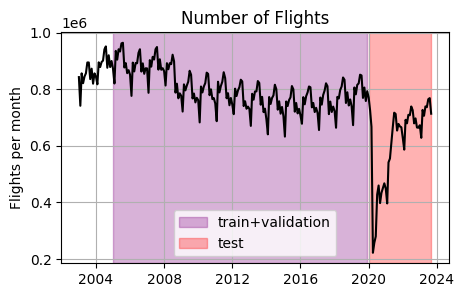

In [112]:
plt.figure(figsize=(5, 3))
plt.plot(df_original['Flt'], color='black')

plt.axvspan(df_train_val.index[0], df_train_val.index[-1],
            color='purple', alpha=0.3, label='train+validation')
plt.axvspan(df_test.index[0], df_test.index[-1],
            color='red', alpha=0.3, label='test')

plt.ylabel('Flights per month')
plt.title('Number of Flights')
plt.grid(True)
plt.legend()
plt.savefig('report/png/B1_TrainTest.png', bbox_inches='tight')
plt.show()

O intervalo de dados de teste e treinamento apresenta um comportamento cíclico, com suaves variações ao longo dos anos. A exceção é 2008, quando eclodiu a crise financeira nos EUA. O intervalo de teste corresponde ao período crítido de restrição de vôos da pandemia de Covid-19 e os anos que se seguiram. É esperado que o modelo apresente dificuldades em prever a série temporal no período mais crítico da pandemia.

Como todas as variáveis de entrada para os modelos lineares são de mesma natureza, uma modificação na escala dos dados não terá qualquer impacto nos resultados dos ajustes dos modelos lineares. No exemplo abaixo de um modelo linear simples (sem normalização), os resultados com e sem modificação na escala dos dados de entrada são idênticos.

In [113]:
def print_rmse(X_train, y_train, X_validation, y_validation):
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f'  Coeficients: {model.intercept_} & {model.coef_}')
    y_train_predict = model.predict(X_train)
    rmse = root_mean_squared_error(y_train_predict, y_train)
    print(f'  train RMSE = {rmse:0.2f}')
    y_validation_predict = model.predict(X_validation)
    rmse = root_mean_squared_error(y_validation_predict, y_validation)
    print(f'  validation RMSE = {rmse:0.2f}')
    return y_validation

columns = ['x_1','x_2']
n_train = 140
y_train = df_train_val[:n_train]['y']
X_train = df_train_val[:n_train][columns]
y_validation = df_train_val[n_train:]['y']
X_validation = df_train_val[n_train:][columns]

print('No scaling')
y_val = print_rmse(X_train, y_train, X_validation, y_validation)

scaler = MinMaxScaler()
scaler.set_output(transform="pandas")
all_x_columns = [f'x_{k+1}' for k in range(24)]
scaler.fit(df_train_val[all_x_columns])

X_train_scaled = scaler.transform(df_train_val[:n_train][all_x_columns])[columns]
X_validation_scaled = scaler.transform(df_train_val[n_train:][all_x_columns])[columns]

print('With scaling')
y_val_scaled = print_rmse(X_train_scaled, y_train, X_validation_scaled, y_validation)

print(f'Estimates are the same: {(y_val == y_val_scaled).all()}')

No scaling
  Coeficients: 2357.791675445802 & [ 1.08601439 -0.17547108]
  train RMSE = 788.91
  validation RMSE = 854.33
With scaling
  Coeficients: 22725.646979800284 & [ 9490.64005956 -1533.43531524]
  train RMSE = 788.91
  validation RMSE = 854.33
Estimates are the same: True


Durante uma primeira tentativa de busca pelo melhor modelo linear, o algoritmo apresentou mensagens de _warning_ sobre a sua convergência quando foram utilizados valores altos de **K** (>15). Ao modificar a escala dos dados de entrada o algoritmo não reportou problemas. Deste modo, as análises seguintes serão feitas com os dados de entrada escalados.

Como existe dependência entre os dados observados, o processo de validação cruzada _clássico_ não pode ser utilizado. Foi utilizada a rotina implementada no pacote _Scikit-Learn_, que segue as ideias apresentadas em [1]. Os dados de validação ($I(v)$) são definidos em índices posteriores aos dos dados de treinamento ($I(t)$):

$\min{}_{i∈I(t), j∈I(v)} |i − j| > h > 0$

Neste exercício o valor de **h** é igual a 1. A rotina segue a lógica da figura abaixo (Fonte: [2]):

![Validação cruzada de série temporal](fXZ6k.png)


[1] Sylvain Arlot, Alain Celisse "A survey of cross-validation procedures for model selection," Statistics Surveys, Statist. Surv. 4(none), 40-79, (2010). http://dx.doi.org/10.1214/09-SS054

[2] stats.stackexchange.com. "Using k-fold cross-validation for time-series model selection". http://web.archive.org/web/20240221145617/https://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection

In [114]:
validation_ratio = 0.2
folds = int(np.floor(1/validation_ratio-1))
print(f'Number of folds = {folds}')

Number of folds = 4


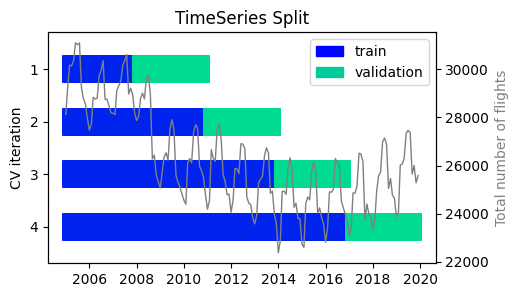

In [115]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=20):
    """Create a sample plot for indices of a cross-validation object."""

    cmap_cv = plt.cm.winter
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(
            X.index,
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    yticklabels = list(range(1, 1+n_splits))
    ax.set(
        yticks=np.arange(n_splits) + 0.5,
        yticklabels=yticklabels,
        ylabel="CV iteration",
        ylim=[n_splits + 0.2, -0.2],
    )
    ax.set_title('TimeSeries Split')
    ax.legend(
        [Patch(color=cmap_cv(0.02)), Patch(color=cmap_cv(0.8))],
        ["train","validation"],
        loc='upper right',
    )
    return ax

fig, ax = plt.subplots(figsize=(5, 3))

cv = TimeSeriesSplit(folds)
plot_cv_indices(cv, df_train_val[['x_1']], df_train_val['y'], ax, folds)

ax2 = ax.twinx()
ax2.plot(df_train_val['y'], color='gray', linewidth=1, label='flights')
ax2.set_ylabel('Total number of flights', color='gray')

# plt.grid(True, linewidth=0.3)
plt.savefig('report/png/B1_Folds.png', bbox_inches='tight')
plt.show()

Antes de seguir com a busca pelo melhor modelo linear, foram propostos três modelos _naïve_:

1. Igual ao passo de tempo anterior: $\hat{y}(t_i) = y(t_{i-1})$
1. Igual ao passo de tempo 12 meses atrás: $\hat{y}(t_i) = y(t_{i-12})$
1. Igual ao passo de tempo 12 meses atrás mais incremento entre 24 e 12 meses atrás: $\hat{y}(t_i) = y(t_{i-12}) + [y(t_{i-12}) - y(t_{i-24})] = 2 y(t_{i-12}) - y(t_{i-24})$

Os modelos _naïve_ foram propostos com base na natureza cíclica da série temporal em estudo. Os valores de **RMSE** e **MAPE** destes modelos servirão como referência para os demais modelos a serem construídos.

In [116]:
naive_coefficients = [
    [1] + 23*[0],
    11*[0] + [1] + 12*[0],
    11*[0] + [2] + 11*[0] + [-1]
]

y_naive = [
    df_train_val['x_1'],
    df_train_val['x_12'],
    2*df_train_val['x_12'] - df_train_val['x_24']
    ]

In [117]:
rmse_naive_list = []

y = df_train_val['y']
X = df_train_val[all_x_columns]
model = LinearRegression()
tscv = TimeSeriesSplit(n_splits=folds)
for coefficients in naive_coefficients:
    def custom_scorer(estimator, X, y):
        y_pred = np.dot(X, coefficients)
        return root_mean_squared_error(y, y_pred)
    scores = cross_val_score(model, X, y, cv=tscv, scoring=custom_scorer)
    rmse_naive_list.append(np.mean(scores))

print('RMSE naïve models:\n  ' +
      '\n  '.join([f'{i+1}. {x:0.2f}' for i,x in enumerate(rmse_naive_list)]))

RMSE naïve models:
  1. 861.25
  2. 765.83
  3. 950.38


Observa-se que os resultados de **RMSE** são relativamente próximos entre os três modelos _naïve_. Em uma inspeção gráfica a primeira proposta de modelo parece ser melhor que as outras duas. Uma avaliação do gráfico do erro cometido por estes modelos demonstra que na verdade os modelos tem níveis de erro parecidos, mas com diferentes frequências.

Por ter os menores valores de **RMSE**, além de apresentar erro mais _comportado_ que as outras alternativas, foi escolhido o segundo modelo _naïve_ para ser utilizado como base para comparação com os demais modelos.

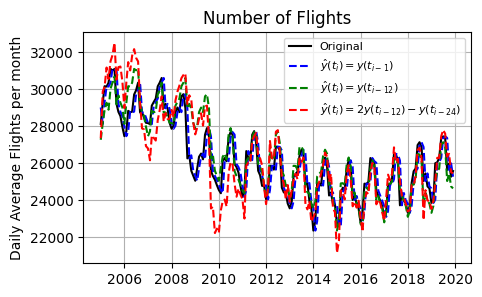

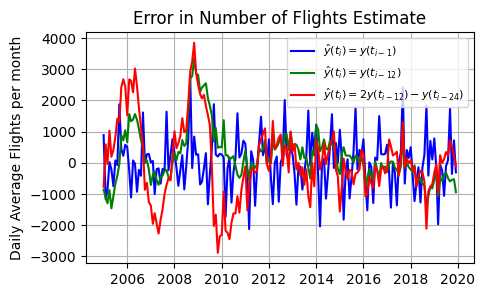

In [118]:
plt.figure(figsize=(5, 3))
plt.plot(df_train_val['y'], color='black', linestyle='-', label='Original')
plt.plot(y_naive[0], color='blue', linestyle='--', label=r'$\hat{y}(t_i) = y(t_{i-1})$')
plt.plot(y_naive[1], color='green', linestyle='--', label=r'$\hat{y}(t_i) = y(t_{i-12})$')
plt.plot(y_naive[2], color='red', linestyle='--', label=r'$\hat{y}(t_i) =2 y(t_{i-12}) - y(t_{i-24})$')

plt.ylabel('Daily Average Flights per month')
plt.title('Number of Flights')
plt.legend(fontsize=8)
plt.grid(True)
plt.savefig('report/png/B1_Naive.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(5, 3))
plt.plot(y_naive[0]-df_train_val['y'], color='blue', linestyle='-', label=r'$\hat{y}(t_i) = y(t_{i-1})$')
plt.plot(y_naive[1]-df_train_val['y'], color='green', linestyle='-', label=r'$\hat{y}(t_i) = y(t_{i-12})$')
plt.plot(y_naive[2]-df_train_val['y'], color='red', linestyle='-', label=r'$\hat{y}(t_i) =2 y(t_{i-12}) - y(t_{i-24})$')

plt.ylabel('Daily Average Flights per month')
plt.title('Error in Number of Flights Estimate')
plt.legend(fontsize=8)
plt.grid(True)
plt.savefig('report/png/B1_NaiveErrors.png', bbox_inches='tight')
plt.show()

In [119]:
rmse_naive = rmse_naive_list[1]
y_naive = np.dot(df_train_val[all_x_columns], naive_coefficients[1])

Foi definido utilizar o modelo **Elastic_Net**. A busca pelo melhor modelo para cada valor de **K** foi feita com uma busca em grade por parâmetros ótimos de _alpha_ e *l1_ratio*.

In [120]:
param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

y = df_train_val['y']
X = scaler.transform(df_train_val[all_x_columns])
model = ElasticNet()
tscv = TimeSeriesSplit(n_splits=folds)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=tscv, scoring='neg_root_mean_squared_error')

scores = []
parameters = []
variables = []
for k in range(24):
    variables = variables + [f'x_{k+1}']
    grid_search.fit(X[variables], y)
    scores.append(-grid_search.best_score_)
    parameters.append(grid_search.best_params_)
    print(f'{k+1}: RMSE = {scores[-1]:0.2f}, parameters = {parameters[-1]}')

1: RMSE = 936.16, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
2: RMSE = 944.01, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
3: RMSE = 980.21, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
4: RMSE = 1031.34, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
5: RMSE = 1123.59, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
6: RMSE = 1205.36, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
7: RMSE = 849.67, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
8: RMSE = 689.60, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
9: RMSE = 687.07, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
10: RMSE = 678.55, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
11: RMSE = 691.97, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
12: RMSE = 650.69, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
13: RMSE = 590.94, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
14: RMSE = 646.92, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
15: RMSE = 722.18, parameters = {'alpha': 0.01, 'l1_ratio': 0.9}
16: RMSE = 762.18, parameters =

Os resultados do _GridSearch_ apontaram para valores baixos de _alpha_. Em face destes resultados a avaliação foi refeita utilizando um modelo linear simples.

In [121]:
y = df_train_val['y']
X = scaler.transform(df_train_val[all_x_columns])
model = LinearRegression()
tscv = TimeSeriesSplit(n_splits=folds)

scores_linear = []
mape_linear = []
variables = []
for k in range(24):
    variables = variables + [f'x_{k+1}']
    scores_ = cross_val_score(model, X[variables], y,
                              cv=tscv, scoring='neg_root_mean_squared_error')
    scores_linear.append(-np.mean(scores_))

    mape_ = cross_val_score(model, X[variables], y,
                              cv=tscv, scoring='neg_mean_absolute_percentage_error')
    mape_linear.append(-np.mean(mape_))

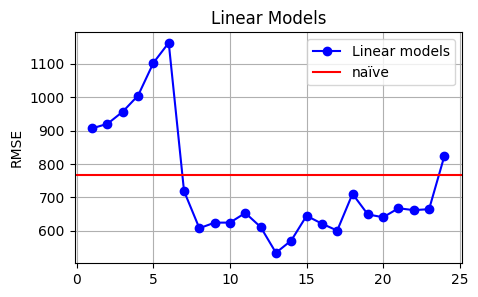

In [122]:
plt.figure(figsize=(5, 3))
plt.plot(range(1,25), scores_linear, color='blue', linestyle='-', marker='o', label='Linear models')
plt.axhline(y=rmse_naive, color='red', linestyle='-', label='naïve')

plt.ylabel('RMSE')
plt.title('Linear Models')
plt.grid(True)
plt.legend()
plt.savefig('report/png/B1_LinearModels.png', bbox_inches='tight')
plt.show()

In [123]:
i_best = scores_linear.index(min(scores_linear))
k_best = i_best + 1
rmse_validation = scores_linear[i_best]
mape_validation = mape_linear[i_best]

print('Cross Validation')
print(f'  RMSE = {rmse_validation:0.2f}')
print(f'  MAPE = {mape_validation:0.2f}')

Cross Validation
  RMSE = 534.25
  MAPE = 0.02


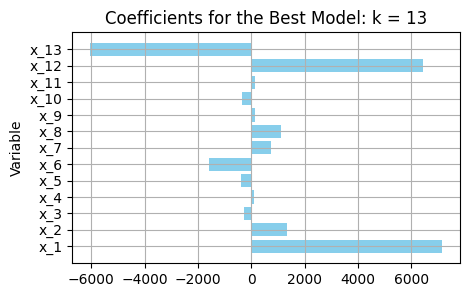

In [124]:
best_columns = [f'x_{k+1}' for k in range(k_best)]
y = df_train_val['y']
X = scaler.transform(df_train_val[all_x_columns])[best_columns]
best_model = LinearRegression()
best_model.fit(X, y)

plt.figure(figsize=(5, 3))
plt.barh(best_columns, best_model.coef_, color='skyblue')
plt.ylabel('Variable')
plt.title(f'Coefficients for the Best Model: k = {k_best}')
plt.grid()
plt.savefig('report/png/B1_Coefficients.png', bbox_inches='tight')
plt.show()

In [125]:
y = df_train_val['y']
X = scaler.transform(df_train_val[all_x_columns])[best_columns]
y_predict = best_model.predict(X)
rmse_train = root_mean_squared_error(y, y_predict)
mape_train = mean_absolute_percentage_error(y, y_predict)

print('Train Data')
print(f'  RMSE = {rmse_train:0.2f}')
print(f'  MAPE = {mape_train:0.4f}')

Train Data
  RMSE = 345.84
  MAPE = 0.0101


Sum of coeficcients: 0.9687
Intercept: 800.53
Intercept / Average value: 0.0305
Sum of coeficcients + Intercept / Average value: 0.9992


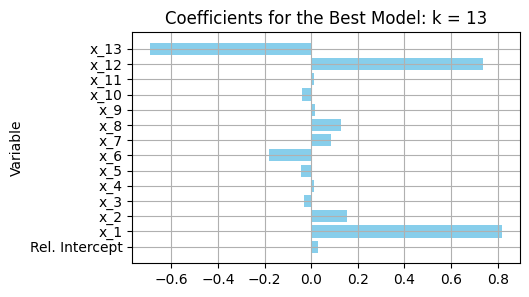

In [126]:
y = df_train_val['y']
X_no_scaling = df_train_val[best_columns]
best_model_no_scaling = LinearRegression()
best_model_no_scaling.fit(X_no_scaling, y)

sum_coef = sum(best_model_no_scaling.coef_)
print(f'Sum of coeficcients: {sum_coef:0.4f}')
intercept = best_model_no_scaling.intercept_
print(f'Intercept: {intercept:0.2f}')
intercept_relative = intercept/best_model_no_scaling.predict(X_no_scaling).mean()
print(f'Intercept / Average value: {intercept_relative:0.4f}')
print(f'Sum of coeficcients + Intercept / Average value: {sum_coef+intercept_relative:0.4f}')

plt.figure(figsize=(5, 3))
plt.barh(['Rel. Intercept'] + best_columns, [intercept_relative] + list(best_model_no_scaling.coef_), color='skyblue')
plt.ylabel('Variable')
plt.title(f'Coefficients for the Best Model: k = {k_best}')
plt.grid()
plt.savefig('report/png/B1_CoefficientsNoScaling.png', bbox_inches='tight')
plt.show()

O gráfico com os valores dos coeficientes utilizados mostra que as variáveis de maior peso foram o passo de tempo anterior (x_1), um ano antes (x_12) e o anterior (x_13). Este resultado guarda certa correspondência com dois dos modelos naïve propostos.

Fica mais fácil analisar os valores dos coeficientes ao construir o modelo linear sem transformar os dados de entrada. O modelo linear pode ser interpretado como uma média ponderada dos valores nos meses anteriores. Observa-se que a soma dos coeficientes com o valor relativo da constante é próxima da unidade.

### Item [b2]

O gráfico com as amostras de teste da série temporal e as respectivas estimativas geradas pela melhor
versão do preditor (i.e., usando o valor de K que levou ao mínimo erro de validação). Obtenha, também, o RMSE e o erro percentual absoluto médio (MAPE, do inglês _mean absolute percentage error_) para o conjunto de teste.

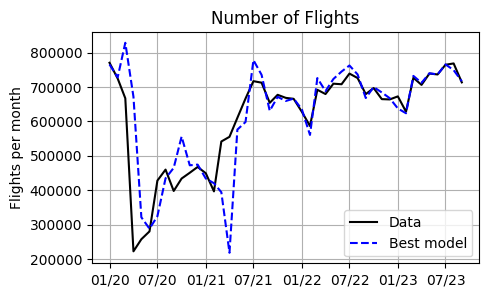

In [127]:
y = df_test['Flt']
X = scaler.transform(df_test[all_x_columns])[best_columns]
y_predict = best_model.predict(X) * df_test['Days_in_month']

plt.figure(figsize=(5, 3))
plt.plot(y, color='black', label='Data')
plt.plot(X.index , y_predict,
         color='blue', linestyle='--', label='Best model')

date_format = DateFormatter("%m/%y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Flights per month')
plt.title('Number of Flights')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('report/png/B2_BestModelFit.png', bbox_inches='tight')
plt.show()

In [128]:
y = df_test['y']
X = scaler.transform(df_test[all_x_columns])[best_columns]
y_predict = best_model.predict(X)
rmse_test = root_mean_squared_error(y, y_predict)
mape_test = mean_absolute_percentage_error(y, y_predict)

print('Test Data')
print(f'  RMSE = {rmse_test:0.2f}')
print(f'  MAPE = {mape_test:0.4f}')

Test Data
  RMSE = 3187.39
  MAPE = 0.1126


O conjunto de teste coincide com o período da pandemia e os meses posteriores. Por se tratar de um evento singular e que não apareceu nos dados de treino e validação, já era esperado que o modelo tivesse dificuldade em prever o comportamento da série temporal. O alto valor de RMSE associado ao conjunto de teste demonstra a dificuldade do modelo.

### Item [b3]

O gráfico com as amostras apenas dos dois últimos anos (2022 e 2023) e as estimativas geradas pelo
melhor preditor, além dos respectivos valores de RMSE e MAPE.

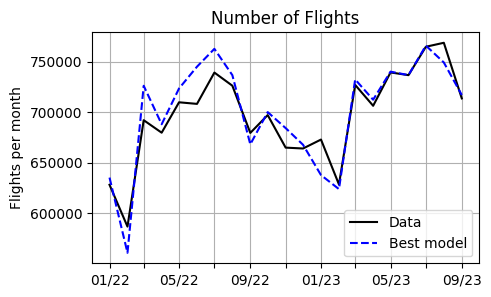

In [129]:
df_2223 = df.loc['2022-01-01':'2023-09-01']

y = df_2223['Flt']
X = scaler.transform(df_2223[all_x_columns])[best_columns]
y_predict = best_model.predict(X) * df_2223['Days_in_month']

plt.figure(figsize=(5, 3))
plt.plot(y, color='black', label='Data')
plt.plot(X.index , y_predict,
         color='blue', linestyle='--', label='Best model')

date_format = DateFormatter("%m/%y")
plt.gca().xaxis.set_major_formatter(date_format)

x_ticks_positions, x_tick_labels = plt.xticks()
for i, label in enumerate(x_tick_labels):
    label.set_visible(i % 2 == 0)

plt.ylabel('Flights per month')
plt.title('Number of Flights')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('report/png/B3_BestModel22_23.png', bbox_inches='tight')
plt.show()

In [130]:
y = df_2223['y']
X = scaler.transform(df_2223[all_x_columns])[best_columns]
y_predict = best_model.predict(X)
rmse_2223 = root_mean_squared_error(y, y_predict)
mape_2223 = mean_absolute_percentage_error(y, y_predict)

print('Test Data (2022-2023)')
print(f'  RMSE = {rmse_2223:0.2f}')
print(f'  MAPE = {mape_2223:0.4f}')

Test Data (2022-2023)
  RMSE = 575.85
  MAPE = 0.0190


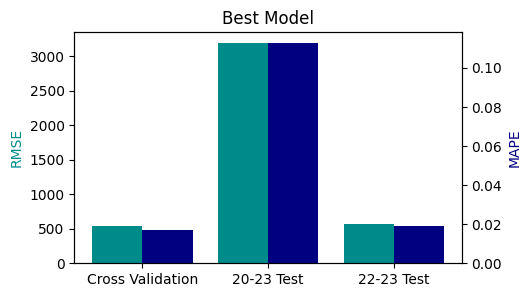

In [131]:
fig, ax1 = plt.subplots(figsize=(5, 3))
labels = ['Cross Validation', '20-23 Test', '22-23 Test']

rmse_best_model = [rmse_validation, rmse_test, rmse_2223]
ax1.bar(np.arange(len(labels)) - 0.2, rmse_best_model, color='darkcyan', width=0.4, align='center')
ax1.set_ylabel('RMSE', color='darkcyan')
plt.title('Best Model')

mape_best_model = [mape_validation, mape_test, mape_2223]
ax2 = ax1.twinx()
ax2.bar(np.arange(len(labels)) + 0.2, mape_best_model, color='navy', width=0.4, align='center')
ax2.set_ylabel('MAPE', color='navy')

ax1.set_xticks(np.arange(len(labels)))
ax1.set_xticklabels(labels)
plt.savefig('report/png/B3_RMSE.png', bbox_inches='tight')
plt.show()

O período de 2022 a 2023 corresponde ao final da pandemia de Covid-19, quando muitas das barreiras sanitárias já estavam sendo levantadas. O comportamento da série temporal neste intervalo já se assemelha mais ao comportamento observado nos dados de treino e validação. Um valor de RMSE mais próximo do observado no processo de validação cruzada mostra que o modelo teve um resultado aceitável para este período.

## Item [c]

Repita o procedimento detalhado nos itens **b1** e **b2**, mas adotando a seguinte divisão dos dados:

* (i) **treinamento**: amostras de 2003 a 2019.
* (ii) **validação**: amostras de 2020 e 2021.
* (iii) **teste**: amostras de 2022 e 2023.

Discuta os resultados obtidos e faça uma comparação com o cenário anterior (especialmente
com o que foi obtido no item **b3**).

O intervalo de validação coincide com o período de maior restrição de deslocamento da pandemia de Covid-19. Como o intervalo de validação está fixo, não será possível fazer validação cruzada.

É esperado que os melhores modelos se limitem aos parâmetros mais recentes para conseguir resultados melhores no período de grande variação na quantidade de vôos.

In [132]:
df2_train = df.loc['2003-01-01':'2019-12-01']
df2_validation = df.loc['2020-01-01':'2021-12-01']
df2_test = df.loc['2022-01-01':'2023-09-01']

print(f'Total number of data points: {len(df)}')
print(f'Number of train data points: {len(df2_train)}')
print(f'Number of validation data points: {len(df2_validation)}')
print(f'Number of test data points: {len(df2_test)}')

Total number of data points: 225
Number of train data points: 180
Number of validation data points: 24
Number of test data points: 21


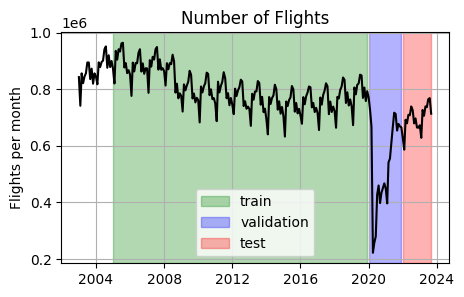

In [133]:
plt.figure(figsize=(5, 3))
plt.plot(df_original['Flt'], color='black')

plt.axvspan(df2_train.index[0], df2_train.index[-1],
            color='green', alpha=0.3, label='train')
plt.axvspan(df2_validation.index[0], df2_validation.index[-1],
            color='blue', alpha=0.3, label='validation')
plt.axvspan(df2_test.index[0], df2_test.index[-1],
            color='red', alpha=0.3, label='test')

plt.ylabel('Flights per month')
plt.title('Number of Flights')
plt.grid(True)
plt.legend()
plt.savefig('report/png/C1_TrainTest.png', bbox_inches='tight')
plt.show()

In [134]:
rmse_naive2_list = []
for coefficients in naive_coefficients:
    y_pred = np.dot(df2_validation[all_x_columns], coefficients)
    rmse_naive2_list.append(root_mean_squared_error(y_pred, df2_validation['y']))

print('RMSE naïve models:\n  ' +
      '\n  '.join([f'{i+1}. {x:0.2f}' for i,x in enumerate(rmse_naive2_list)]))

RMSE naïve models:
  1. 3304.75
  2. 11023.11
  3. 17523.33


In [135]:
rmse_naive2 = rmse_naive2_list[0]

O modelo _naïve_ de melhor resultado foi o que utiliza o valor do mês anterior. Como o intervalo de validação corresponde ao período de restrição da pandemia de Covid-19, os modelos que se baseiam em horizontes de tempo mais longo tem mais dificuldade de prever o comportamento.

In [136]:
y_train = df2_train['y']
X_train = scaler.transform(df2_train[all_x_columns])
y_val = df2_validation['y']
X_val = scaler.transform(df2_validation[all_x_columns])
model = LinearRegression()

scores2 = []
variables = []
for k in range(24):
    variables = variables + [f'x_{k+1}']
    model.fit(X_train[variables], y_train)
    y_predict = model.predict(X_val[variables])
    scores2.append(root_mean_squared_error(y_val, y_predict))

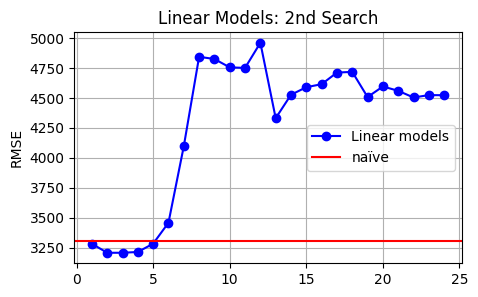

In [137]:
plt.figure(figsize=(5, 3))
plt.plot(range(1,25), scores2, color='blue', linestyle='-', marker='o', label='Linear models')
plt.axhline(y=rmse_naive2, color='red', linestyle='-', label='naïve')
plt.ylabel('RMSE')
plt.title('Linear Models: 2nd Search')
plt.grid(True)
plt.legend()
plt.savefig('report/png/C1_LinearModels.png', bbox_inches='tight')
plt.show()

O mesmo comportamento observado entre os modelos _naïve_ apareceu na seleção de modelos em função da quantidade de passos de tempo passados. Os modelos que se restringem a dados de passos de tempo mais recentes apresentaram melhores resultados devido ao conjunto de dados de validação utilizado.

O melhor modelo é o que se baseia apenas nos dois passos anteriores, e com maior impacto do passo de tempo imediatamente anterior. 

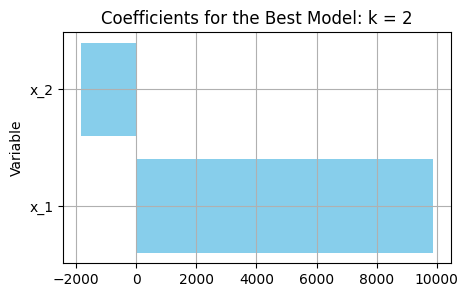

In [138]:
df2_train_val = pd.concat([df2_train, df2_validation])

i_best2 = scores2.index(min(scores2))
k_best2 = i_best2 + 1

best_columns2 = [f'x_{k+1}' for k in range(k_best2)]
y = df2_train_val['y']
X = scaler.transform(df2_train_val[all_x_columns])[best_columns2]
best_model2 = LinearRegression()
best_model2.fit(X, y)

plt.figure(figsize=(5, 3))
plt.barh(best_columns2, best_model2.coef_, color='skyblue')
plt.ylabel('Variable')
plt.title(f'Coefficients for the Best Model: k = {k_best2}')
plt.grid()
plt.savefig('report/png/C1_Coefficients.png', bbox_inches='tight')
plt.show()

Sum of coeficcients: 0.9211
Intercept: 1961.83
Intercept / Average value: 0.0778
Sum of coeficcients + Intercept / Average value: 0.9989


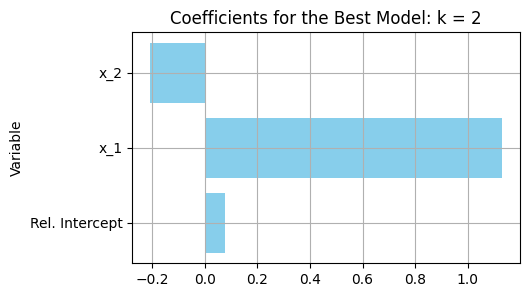

In [139]:
y = df2_train_val['y']
X_no_scaling = df2_train_val[best_columns2]
best_model2_no_scaling = LinearRegression()
best_model2_no_scaling.fit(X_no_scaling, y)

sum_coef = sum(best_model2_no_scaling.coef_)
print(f'Sum of coeficcients: {sum_coef:0.4f}')
intercept = best_model2_no_scaling.intercept_
print(f'Intercept: {intercept:0.2f}')
intercept_relative = intercept/best_model2_no_scaling.predict(X_no_scaling).mean()
print(f'Intercept / Average value: {intercept_relative:0.4f}')
print(f'Sum of coeficcients + Intercept / Average value: {sum_coef+intercept_relative:0.4f}')

plt.figure(figsize=(5, 3))
plt.barh(['Rel. Intercept'] + best_columns2, [intercept_relative] + list(best_model2_no_scaling.coef_), color='skyblue')
plt.ylabel('Variable')
plt.title(f'Coefficients for the Best Model: k = {k_best2}')
plt.grid()
plt.savefig('report/png/C1_CoefficientsNoScaling.png', bbox_inches='tight')
plt.show()

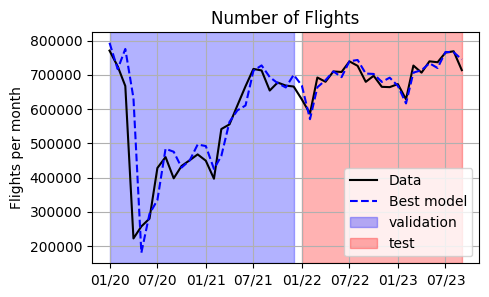

In [140]:
df2_val_test = pd.concat((df2_validation, df2_test))
y = df2_val_test['Flt']
X = scaler.transform(df2_val_test[all_x_columns])[best_columns2]
y_predict = best_model2.predict(X) * df2_val_test['Days_in_month']

plt.figure(figsize=(5, 3))
plt.plot(y, color='black', label='Data')
plt.plot(X.index , y_predict,
         color='blue', linestyle='--', label='Best model')

date_format = DateFormatter("%m/%y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.axvspan(df2_validation.index[0], df2_validation.index[-1],
            color='blue', alpha=0.3, label='validation')
plt.axvspan(df2_test.index[0], df2_test.index[-1],
            color='red', alpha=0.3, label='test')

plt.ylabel('Flights per month')
plt.title('Number of Flights')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('report/png/C2_BestModelFit.png', bbox_inches='tight')
plt.show()

In [141]:
y = df2_test['y']
X = scaler.transform(df2_test[all_x_columns])[best_columns2]
y_predict = best_model2.predict(X)
rmse_best2 = root_mean_squared_error(y, y_predict)
mape_best2 = mean_absolute_percentage_error(y, y_predict)
print('Test Data: new model')
print(f'  RMSE = {rmse_best2:0.2f}')
print(f'  MAPE = {mape_best2:0.4f}')

Test Data: new model
  RMSE = 590.57
  MAPE = 0.0208


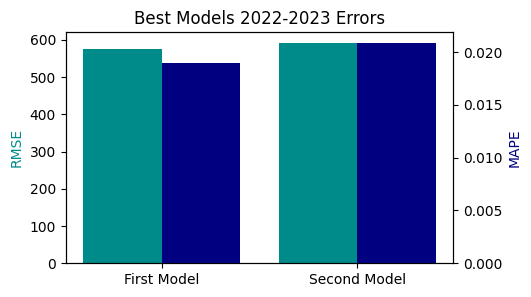

In [142]:
fig, ax1 = plt.subplots(figsize=(5, 3))
labels = ['First Model', 'Second Model']

rmse_best_models = [rmse_2223, rmse_best2]
ax1.bar(np.arange(len(labels)) - 0.2, rmse_best_models, color='darkcyan', width=0.4, align='center')
ax1.set_ylabel('RMSE', color='darkcyan')

mape_best_models = [mape_2223, mape_best2]
ax2 = ax1.twinx()
ax2.bar(np.arange(len(labels)) + 0.2, mape_best_models, color='navy', width=0.4, align='center')
ax2.set_ylabel('MAPE', color='navy')

plt.title('Best Models 2022-2023 Errors')
ax1.set_xticks(np.arange(len(labels)))
ax1.set_xticklabels(labels)
plt.savefig('report/png/C3_RMSE.png', bbox_inches='tight')
plt.show()

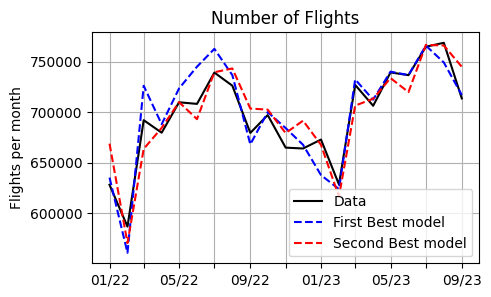

In [143]:
df_ = df.loc['2022-01-01':'2023-09-01']

y = df_['Flt']
X = scaler.transform(df_[all_x_columns])[best_columns]
y_predict = best_model.predict(X) * df_['Days_in_month']
X = scaler.transform(df_[all_x_columns])[best_columns2]
y_predict2 = best_model2.predict(X) * df_['Days_in_month']

plt.figure(figsize=(5, 3))
plt.plot(y, color='black', label='Data')
plt.plot(X.index , y_predict,
         color='blue', linestyle='--', label='First Best model')
plt.plot(X.index , y_predict2,
         color='red', linestyle='--', label='Second Best model')

date_format = DateFormatter("%m/%y")
plt.gca().xaxis.set_major_formatter(date_format)

x_ticks_positions, x_tick_labels = plt.xticks()
for i, label in enumerate(x_tick_labels):
    label.set_visible(i % 2 == 0)

plt.ylabel('Flights per month')
plt.title('Number of Flights')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('report/png/C3_BestModel22_23.png', bbox_inches='tight')
plt.show()

Para os anos de 2022 e 2023 os dois modelos construídos mostraram resultados próximos. A definição dos períodos de treino e validação tiveram impacto no número de parâmetros de cada modelo. Ambos modelos dependem muito do valor do mês anterior para estimar o próximo, mas são incapazes de responder adequadamente a eventos que levam a variações abruptas. Variáveis adicionais seriam necessárias para permitir que os modelos lineares conseguissem aproximar melhor eventos como as restrições impostas pela Pandemia de Covid-19.

Foi feita uma extrapolação recursiva do período de teste a partir do último valor do período de validação. Como esperado, o primeiro modelo não consegue prever o comportamento da série durante a pandemia. O modelo apresenta um comportamento _relativamente_ estável nesta previsão recursiva. Depois de cerca de um ano o primeiro modelo começa a apresentar um comportamento errático, o que coincide com o passo de tempo em que realiza previsões baseadas apena em dados estimados pelo próprio modelo. Observa-se que o segundo modelo, que se baseia unicamente nos dois valores mais recentes, rapidamente perde a capacidade de realizar qualquer previsão confiável. Nenhum dos modelos pode ser utilizado para realizar previsões além do mês seguinte. É necessário realizar uma ajuste específico para valores de L maiores que um.

In [144]:
def make_extrapolation(df_initial, n_time_steps, model, x_columns):
    df_extrap = df_initial.iloc[-1:].copy()
    columns=['Flt', 'Days_in_month', 'y'] + all_x_columns

    for _ in range(n_time_steps):
        year = df_extrap.index[-1].year
        month = df_extrap.index[-1].month + 1
        if month == 13:
            month = 1
            year += 1
        new_date = pd.to_datetime({'year': [year],
                        'month': [month],
                        'day': [1]})
        days_in_month = new_date[0].days_in_month

        X = scaler.transform(df_extrap.iloc[-1:][all_x_columns])[x_columns]
        y = model.predict(X)[0]

        x_1 = df_extrap.iloc[-1]['y']
        values = [y * days_in_month,
                days_in_month,
                y,
                x_1]

        for j in range(23):
            values.append(df_extrap.iloc[-1][f'x_{j+1}'])

        df2 = pd.DataFrame([values],
                    columns=columns,
                    index=new_date)
        df_extrap = pd.concat([df_extrap, df2])
    return df_extrap

df_extrap = make_extrapolation(df_initial=df_train_val,
                               n_time_steps=len(df_test),
                               model=best_model,
                               x_columns=best_columns)
df_extrap2 = make_extrapolation(df_initial=df2_validation,
                               n_time_steps=len(df2_test),
                               model=best_model2,
                               x_columns=best_columns2)

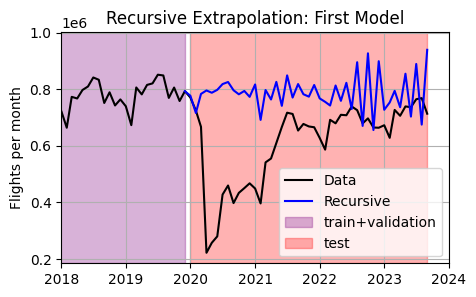

In [145]:
plt.figure(figsize=(5, 3))
plt.plot(df_original['Flt'], color='black', linestyle='-', label='Data')
ymin, ymax = plt.ylim()
plt.plot(df_extrap['Flt'], color='blue', linestyle='-', label='Recursive')
plt.ylim(ymin, ymax)

plt.axvspan(df_train_val.index[0], df_train_val.index[-1],
            color='purple', alpha=0.3, label='train+validation')
plt.axvspan(df_test.index[0], df_test.index[-1],
            color='red', alpha=0.3, label='test')

plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01'))

plt.ylabel('Flights per month')
plt.title('Recursive Extrapolation: First Model')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('report/png/C3_RecursiveExtrapolation.png', bbox_inches='tight')
plt.show()

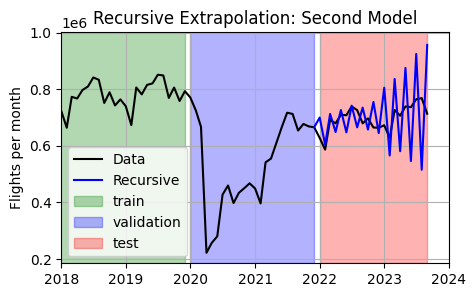

In [146]:
plt.figure(figsize=(5, 3))
plt.plot(df_original['Flt'], color='black', linestyle='-', label='Data')
ymin, ymax = plt.ylim()
plt.plot(df_extrap2['Flt'], color='blue', linestyle='-', label='Recursive')
plt.ylim(ymin, ymax)

plt.axvspan(df2_train.index[0], df2_train.index[-1],
            color='green', alpha=0.3, label='train')
plt.axvspan(df2_validation.index[0], df2_validation.index[-1],
            color='blue', alpha=0.3, label='validation')
plt.axvspan(df2_test.index[0], df2_test.index[-1],
            color='red', alpha=0.3, label='test')

plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01'))

plt.ylabel('Flights per month')
plt.title('Recursive Extrapolation: Second Model')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('report/png/C3_RecursiveExtrapolation_new.png', bbox_inches='tight')
plt.show()